In [61]:
import pandas as pd

df = pd.read_csv("c:/data/customer/customer.csv")
df.columns

Index(['Int'l Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn'],
      dtype='object')

In [62]:
cols = [
    "Int'l Plan",
    "VMail Plan",
    "VMail Message",
    "Day Mins",
    "Day Calls",
    "Day Charge",
    "Eve Mins",
    "Eve Calls",
    "Eve Charge",
    "Night Mins",
    "Night Calls",
    "Night Charge",
    "Intl Mins",
    "Intl Calls",
    "Intl Charge",
    "CustServ Calls",
]

X = df[cols]
y = df["Churn"]
y.value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [63]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample, columns=cols)
y_samp = pd.DataFrame(data=y_sample, columns=["Churn"])

df_samp = pd.concat([X_samp, y_samp], axis=1)
df_samp["Churn"].value_counts()

Churn
0    483
1    483
Name: count, dtype: int64

In [64]:
X = df_samp[cols]
y = df_samp["Churn"]

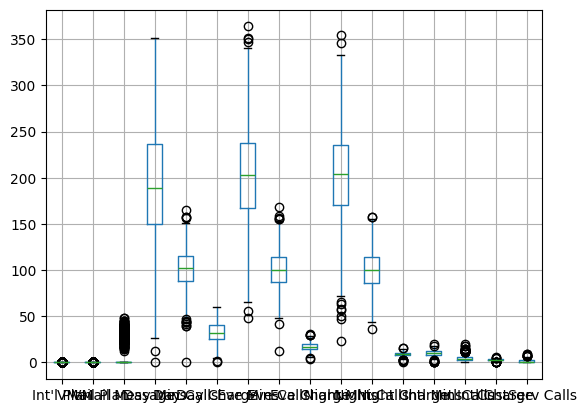

In [65]:
import matplotlib.pyplot as plt

X.boxplot()
plt.show()

In [66]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()  # 평균0, 표준편차 1
scaler.fit(X)  # 패턴분석
X_scaled = pd.DataFrame(scaler.transform(X))

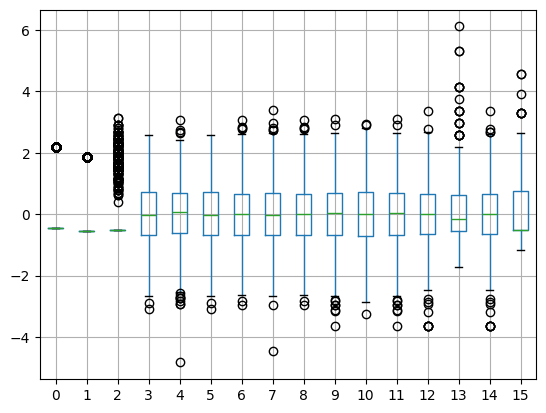

In [67]:
X_scaled.boxplot()
plt.show()

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
import numpy as np

svm = SVC(random_state=0).fit(X, y)
# 모형을 만드는데 사용된 변수들의 특성 중요도 - 트리 알고리즘에 더욱 적합한 방법
result1 = permutation_importance(svm, X, y, n_repeats=10, random_state=0, n_jobs=-1)
#                                               반복횟수                 변수의 중요도
importances1 = np.array(list(zip(X.columns, result1.importances_mean)))
rf = RandomForestClassifier(random_state=0).fit(X, y)
result2 = permutation_importance(rf, X, y, n_repeats=10, random_state=0, n_jobs=-1)
importances2 = np.array(list(zip(X.columns, result2.importances_mean)))

In [69]:
df2 = pd.DataFrame(importances1, columns=["variable", "importance"])
df2.sort_values("importance", ascending=False)

,variable,importance
3,Day Mins,0.15186335403726708
6,Eve Mins,0.052380952380952375
12,Intl Mins,0.003209109730848847
10,Night Calls,0.0026915113871635588
9,Night Mins,0.0025879917184264967
4,Day Calls,0.0025879917184264854
2,VMail Message,0.0023809523809523725
7,Eve Calls,0.002277432712215344
13,Intl Calls,0.001138716356107683
15,CustServ Calls,0.001138716356107683


In [70]:
df2 = pd.DataFrame(importances2, columns=["variable", "importance"])
df2.sort_values("importance", ascending=False)

,variable,importance
15,CustServ Calls,0.1571428571428571
0,Int'l Plan,0.09679089026915115
5,Day Charge,0.05786749482401656
3,Day Mins,0.04886128364389233
13,Intl Calls,0.02204968944099379
6,Eve Mins,0.021635610766045543
8,Eve Charge,0.02142857142857142
10,Night Calls,0.013975155279503127
4,Day Calls,0.01314699792960664
7,Eve Calls,0.009109730848861287


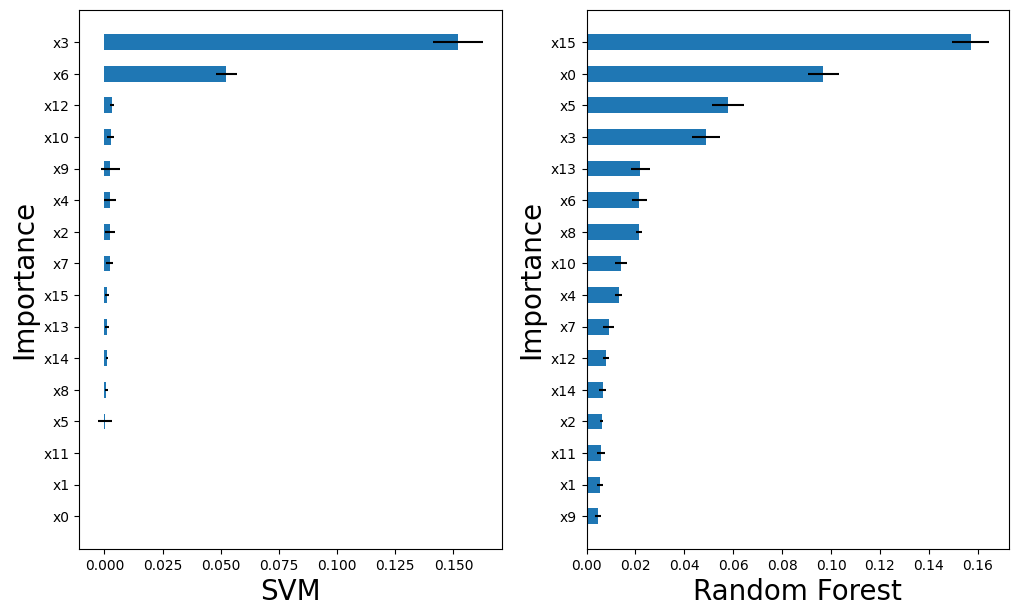

In [71]:
def plot_importance(importance, importance_std, ax, x_label, y_label="Importance"):
    temp1 = [f"x{i}" for i in range(len(importance))]
    temp2 = importance
    temp3 = importance_std
    result = sorted(zip(temp1, temp2, temp3), key=lambda x: x[1])
    label = [x[0] for x in result]
    value = [x[1] for x in result]
    value_2 = [x[2] for x in result]
    ax.barh(label, value, xerr=value_2, height=0.5)
    ax.set_xlabel(x_label, fontsize=20)
    ax.set_ylabel(y_label, fontsize=20)


# 시각화
fig, axs = plt.subplots(1, 2)
fig.set_facecolor("white")
fig.set_figwidth(12)
fig.set_figheight(7)

ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

plot_importance(result1.importances_mean, result1.importances_std, ax1, "SVM")
plot_importance(result2.importances_mean, result2.importances_std, ax2, "Random Forest")

plt.show()